<center> <span style="color:black;font-weight:700;font-size:30px">
    Multivariate Regression and Mediation Analysis of 
    <br /> School to Work Transition in Recent Graduates 
    
    
  
    


# Project Overview

This is my Master's thesis research project, I conducted a quantitative research on the school to work transition process using a sample of 303 North American university recent graduates. The current research tested some of the theoretical assumptions from the career development and vocational behaviour literature on the transition process. Participants were recruited using Qualtrics and Amazon MTurk. In this project, I conducted mutivariate regression and mediation analysis, assumption tests, and post-hoc tests using various Python packages.

- Tested multiple hypotheses using a sample of collected survey data
- Recoding SPSS variables to compatible python equivalents
- Data cleaning of missing values
- Outlier detection and exemption
- Assumption tests (Multicollinearity, linearity, normality, homoscedasticity tests)
- Multivariate regression and Mediation analyses
- Post-Hoc tests and results

# Why doing this research?
The transition from university to the workforce can be a daunting experience for many university graduates, due, at least in part, to an increasingly competitive, and often unstable labour market. University students are increasingly challenged to complete traditional classroom learning while also developing vocational identities and the skills needed to adapt to the 21st century workforce. According to the model, successful career adaptation (adaptive results) is a function of relatively stable individual differences (adaptivity), psychosocial resources used to manage career-related challenges (adaptability resources), and the specific behaviours that people engage in to address occupational challenges (adaptive responses). 

Using a retrospective recall design, the current study tested some of the key theoretical assumptions of the career construction model of adaptation in the context of the school-to-work transition with a sample of 303 recent university graduates. The results showed that career adaptability resources mediated the relationship between adaptivity (proactive personality, cognitive flexibility) and adapting responses (proactive career behaviour, career construction behaviour). Career adaptability was also positively related to perceived career success and person-job fit perceptions; this positive relationship was partially mediated by proactive career behaviours. Overall, these findings support the career construction model of adaptation and contribute to a more comprehensive understanding of career construction theory and the school-to-work transition process.  

# Results

The results showed that career adaptability resources mediated the relationship between adaptivity (proactive personality, cognitive flexibility) and adapting responses (proactive career behaviour, career construction behaviour). Career adaptability was also positively related to perceived career success and person-job fit perceptions; this positive relationship was partially mediated by proactive career behaviours. Overall, these findings support the career construction model of adaptation and contribute to a more comprehensive understanding of career construction theory and the school-to-work transition process.  





## Table of Contents

<a href="#Table-of-Contents"> </a>

- <a href="#Load-Packages-and-Data">Load Packages and Data </a>
- <a href="#Demographics-and-Participants">Demographics and Participants </a>
- <a href="#Data-Cleaning">Data Cleaning </a>
    - <a href="#Recoding-Variables">Recoding Variables </a>
    - <a href="#Multivariate-Outlier-Detection-and-Exemption">Multivariate Outlier Detection and Exemption </a>
- <a href="#Testing-of-Assumptions">Testing of Assumptions </a>
    - <a href="#Correlations">Correlations </a>
    - <a href="#Test-of-Linearity-Assumption">Test of Linearity Assumption </a>
    - <a href="#Test-of-Normality-Assumption">Test of Normality Assumption </a>
    - <a href="#Test-of-Homoscedasticity">Test of Homoscedasticity </a>
- <a href="#Results">Results </a>
    - <a href="#Regression-Analysis">Regression Analysis </a>
        - <a href="#Hypothesis-1">Hypothesis 1 </a>
    - <a href="#Mediation-Analyses">Mediation Analyses </a>
        - <a href="#Hypothesis-2">Hypothesis 2 </a>
        - <a href="#Hypothesis-3">Hypothesis 3 </a>
        - <a href="#Hypothesis-4">Hypothesis 4 </a>
    - <a href="#Post-Hoc-test-using-False-Discovery-Rate">Post Hoc test using False Discovery Rate </a>
        - <a href="#Accepted-hypothesis-tests">Accepted hypothesis tests </a>

## Hypothesis



H1: Adaptivity (proactive personality, cognitive flexibility) will be positively associated with adapting responses (proactive career behaviours and career construction behaviours).

H2: Adaptability resources (career adaptability) will mediate the relationship between adaptivity (proactive personality, cognitive flexibility) and adapting responses (proactive career behaviours and career construction behaviours)

H3: Adaptability resources (career adaptability) will be negatively associated with negative adaptation results (turnover intention).

H4: Adapting responses (proactive career behaviours and career construction behaviours) will mediate the relationship between adaptability resources (career adaptabilities) and adaptation results (perceived career success, turnover intention, person-job fit perception).



<span style="color:black;font-weight:700;font-size:15px">
   <br/> Predicting Variables
</span>
 <br/>CF - Cognitive Flexibility Scale (Martin & Rubin, 1995)
<br/>PP - Proactive Personality Scale (Seibert, Crant, & Kraimer, 1999)
<span style="color:black;font-weight:700;font-size:15px">
    <br/><br/>Mediating Variables
</span>
<br/>CAAS - Career Adapt-Ability Scale (CAAS; Savickas & Porfeli, 2012)
<br/>PCB - Proactive Career Behaviour Scale (Strauss et al., 2012)
<br/>SCCI - Student Career Construction Inventory (SCCI; Savickas et al., 2018)
<span style="color:black;font-weight:700;font-size:15px">
    <br/><br/>Outcome Variables
</span>
<br/>PCS - Perceived Career Success (Greenhaus, Parasuraman, & Wormley, 1990)
<br/>TI - Turnover Intention Scale ( Bothma & Roodt, 2013)
<br/>PJFit - Person-Job Fit Scale (Cable & DeRue, 2002)


## Load Packages and Data

In [4]:
import pandas as pd # data manipulation
import numpy as np # data analysis 
import matplotlib.pyplot as plt # plotting
import seaborn as sns # visualization
import warnings # warnings
import pyreadstat # reading sav file
import pingouin as pg # regression analysis


import scipy as stats
from scipy.stats import chi2
from scipy.spatial import distance # mahalanobis distance
from pingouin import mediation_analysis # mediation analysis
warnings.filterwarnings("ignore")




In [5]:
# load data recent graduates with labels using pyreadstat: df, label
# install pyreadstat

df, label  = pyreadstat.read_sav('CCM data.sav')
df_labeled = pyreadstat.set_value_labels(df, label)

In [6]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration__in_seconds_,Finished,RecordedDate,ResponseId,RecipientLastName,...,Q168.0,Q169.0,Q171.0,Q170.0,Q172.0,Q174.0,Q173,Q177,Random_ID,filter_$
0,2021-05-26 13:21:21,2021-05-26 13:33:23,0.0,192.158.228.130,100.0,722.0,1.0,2021-05-26 13:33:23,R_3oRvkSk8WEMbDTg,,...,NaN,4.0,4.0,4.0,4.0,4.0,4.0,NaN,61265,1.0
1,2021-05-27 10:08:58,2021-05-27 10:27:29,0.0,212.162.151.88,100.0,1110.0,1.0,2021-05-27 10:27:29,R_bkBiOwspjeuGuop,,...,NaN,5.0,1.0,2.0,5.0,7.0,6.0,NaN,69873,0.0
2,2021-05-28 23:55:01,2021-05-29 00:02:16,0.0,76.182.181.192,100.0,434.0,1.0,2021-05-29 00:02:16,R_PAPG1ve0SsIpEo9,,...,NaN,7.0,7.0,6.0,6.0,7.0,7.0,NaN,16645,0.0
3,2021-05-26 15:51:22,2021-05-26 16:02:30,0.0,73.195.109.239,100.0,667.0,1.0,2021-05-26 16:02:31,R_1dmi9794gYLQl5D,,...,NaN,7.0,7.0,7.0,7.0,7.0,7.0,NaN,68228,1.0
4,2021-05-27 12:21:11,2021-05-27 12:29:02,0.0,174.57.246.250,100.0,470.0,1.0,2021-05-27 12:29:02,R_Av8wPqlay4WHgop,,...,NaN,6.0,5.0,2.0,4.0,6.0,6.0,NaN,39733,1.0


[<a href="#Table-of-Contents">Back to top </a>]

## Demographics and Participants

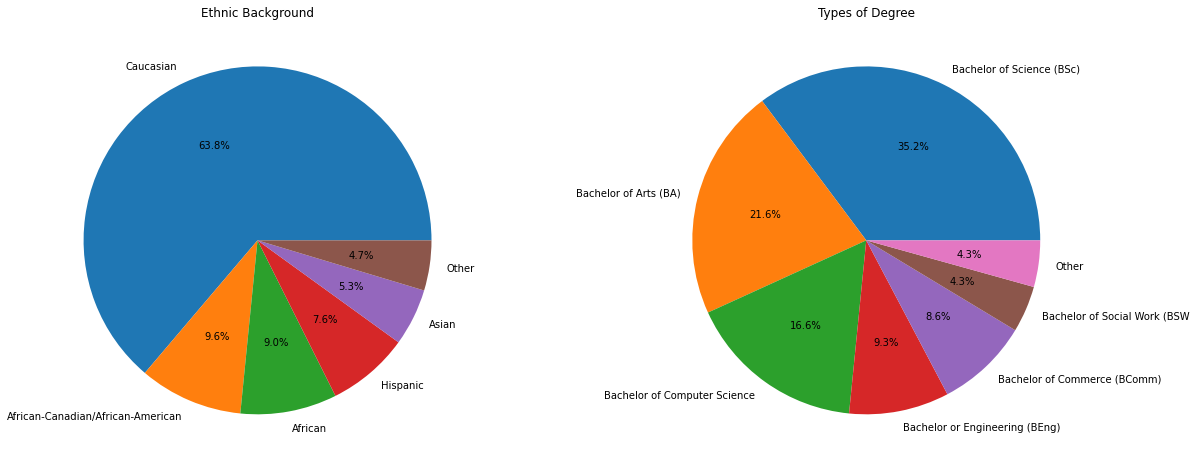

In [7]:
# Ethnic Background of participants
ethnic_values = df_labeled['Q10'].value_counts()
# Combine small values to 'Other' for better visualization
df_labeled['Q10_c'] = df_labeled['Q10'].replace(['Biracial', 'Indigenous','Middle Eastern', 'Multiracial'], 'Other')
ethnic_values_c = df_labeled['Q10_c'].value_counts()

# Frequency type of degrees
degrees_values = df_labeled['Q14'].value_counts()
# Combine small to 'Other' for better visualization
df_labeled['Q14_c'] = df_labeled['Q14'].replace(['Bachelor of Nursing (BSN)', 'Bachelor of Environmental Science',
                                                'Bachelor of Environmental Studies'], 'Other')
degrees_values_c = df_labeled['Q14_c'].value_counts()

# plot the two figures
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ethnic_values_c.plot(kind = 'pie', ylabel = '', radius = 1, autopct='%1.1f%%', ax=ax1)
degrees_values_c.plot(kind = 'pie', ylabel = '', radius = 1, autopct='%1.1f%%', ax=ax2)
ax1.title.set_text('Ethnic Background')
ax2.title.set_text('Types of Degree')
plt.show()


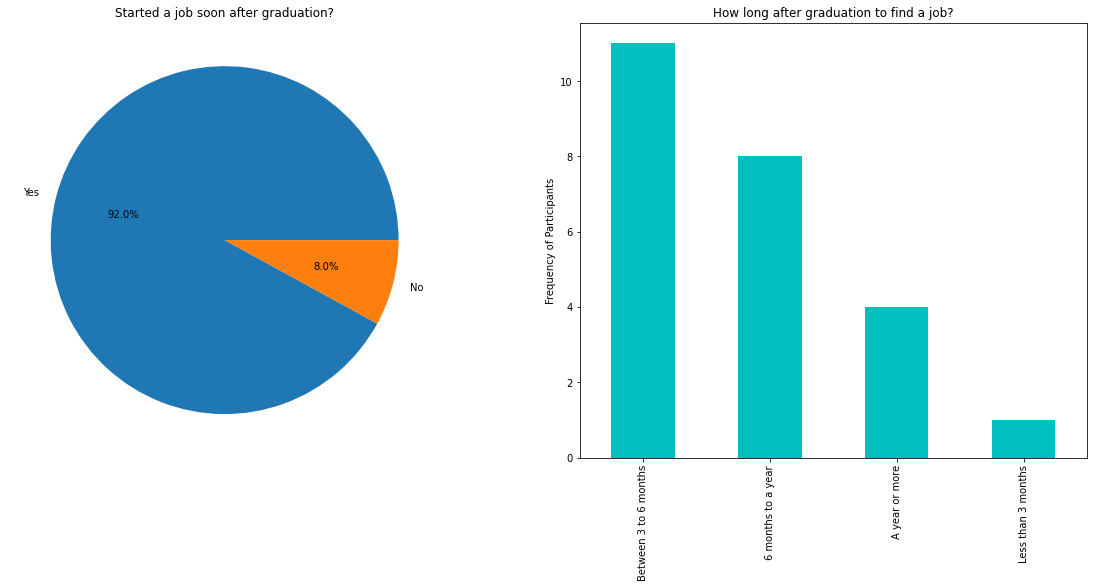

In [8]:
# Whether the participants started job soon after university
start_job_values = df_labeled['Q18'].value_counts()
# How long did they start working after graduation
time_first_job_values = df_labeled['Q19'].value_counts()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
start_job_values.plot(kind = 'pie', ylabel = '', autopct='%1.1f%%', ax=ax1)
time_first_job_values.plot(kind = 'bar', color = 'c',  ylabel = 'Frequency of Participants', ax=ax2)

ax1.title.set_text('Started a job soon after graduation?')
ax2.title.set_text('How long after graduation to find a job?')
plt.show()


[<a href="#Table-of-Contents">Back to top </a>]

## Data Cleaning

In [9]:
# Identify potential missing data

df.columns[df.isnull().any()]

Index(['Q19', 'Q130', 'Q65', 'Q37', 'Q113', 'Q124', 'Q139', 'Q155.0', 'Q161.0',
       'Q168.0', 'Q177'],
      dtype='object')

In [10]:
# There was one case of missing value for Q139
# The rest were either demographics questionnaires or attention checker items
# Replace the missing value with the mean of the column for 'Q139'

df['Q139'] = df['Q139'].fillna(df['Q139'].mean())

In [11]:
# Check if there are any missing values in Q139

df['Q139'].isna().sum()

0

### Recoding Variables

In [12]:
# Survey responses are ranked on a Likert scale between 1 to 5 and 1 to 7
# From Never to Always (1 to 5 scale) and strongly disagree to strongly agree (1 to 7 scale)
# Q138, Q139, Q141, Q146 are reverse coded questionnaire items
# Transform these negatively worded items to reflect the true direction of the survey instrument
# GPA column (Q15) values are also reverse coded from 1 to 12 (for 12 point CGPA, with 12 being A+ and 1 being F)

df['Q138R'] = df['Q138'].replace([1,2,3,4,5,6,7],[7,6,5,4,3,2,1], inplace = False)
df['Q139R'] = df['Q139'].replace([1,2,3,4,5,6,7],[7,6,5,4,3,2,1], inplace = False)
df['Q141R'] = df['Q141'].replace([1,2,3,4,5,6,7],[7,6,5,4,3,2,1], inplace = False)
df['Q146R'] = df['Q146'].replace([1,2,3,4,5,6,7],[7,6,5,4,3,2,1], inplace = False)

df['Q166.0R'] = df['Q166.0'].replace([1,2,3,4,5],[5,4,3,2,1], inplace = False)
df['Q167.0R'] = df['Q167.0'].replace([1,2,3,4,5],[5,4,3,2,1], inplace = False)
df['Q15R'] = df['Q15'].replace([1,2,3,4,5,6,7,8,9,10,11,12],[12,11,10,9,8,7,6,5,4,3,2,1], inplace = False)


In [13]:
# Recode Career Adapt-Ability Scale
df['CAAS'] = df[['Q87','Q90','Q91','Q92','Q93','Q94',
                         'Q95','Q96','Q97','Q98','Q99','Q100',
                         'Q101','Q102','Q103','Q104','Q105','Q106',
                         'Q107','Q108','Q109','Q110','Q111','Q112']].mean(axis = 1)
# Recode Proactive Career Behaviours
df['PCB'] = df [['Q22','Q23','Q24','Q25','Q26','Q27','Q28',
                'Q29','Q30','Q32','Q33','Q35','Q36']].mean(axis = 1)

# Recode Student Career Construction Inventory
df['SCCI'] = df[['Q63','Q174','Q151','Q152','Q153',
                'Q154','Q155','Q156','Q157','Q158',
                'Q159','Q160','Q161','Q162','Q163',
                'Q164','Q165','Q166','Q167','Q168',
                'Q169','Q175','Q170','Q171','Q172']].mean(axis = 1)

# Recode Proactive Personality
df['PP'] = df[['Q114','Q115','Q116','Q117','Q118',
              'Q119','Q120','Q121','Q122', 'Q123',]].mean(axis = 1)

# Recode Cognitive Flexibility
df['CF'] = df[['Q125','Q138R','Q139R','Q140','Q141R','Q142',
              'Q143','Q144','Q145','Q146R','Q147','Q148',]].mean(axis = 1)

# Recode Perceived Career Success
df['PCS'] = df[['Q156.0','Q157.0','Q158.0','Q159.0','Q160.0']].mean(axis = 1)

# Recode Turnover Intentions
df['TI'] = df[['Q162.0','Q163.0','Q164.0','Q165.0','Q166.0R','Q167.0R']].mean(axis = 1)

# Recode Person-Job Fit 
df['PJFIT'] = df[['Q169.0','Q171.0','Q170.0','Q172.0','Q174.0','Q173',]].mean(axis = 1)

# Rename columns: Gender, Age, GPA, CO-OP Exp
df.rename(columns={'Q7': 'Gender', 'Q9': 'Age', 'Q15R': 'GPA', 'Q16': 'CO-OP Exp', }, inplace=True)


### Multivariate Outlier Detection and Exemption

In [14]:
# Mahalanobis Distance function
# Mahalanobis Distance is used to determine outliers within multivarite space

def calculateMahalanobis(y=None, data=None, cov=None):
  
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal.diagonal()


Mahalanobis Distance (DM) refers to the distance between a point and a distribution.
It is an effective distance metric to determine outliers in a dataset.
![title](./mahala.JPG)

In [15]:
# Determine the mahalanobis distance

# Set up mahalanobis distance: df_mal_predictor_one
# df_mal_predictor_one contains the five predictor variables of interest 
df_mal_predictor_one = pd.DataFrame(df, columns = ['CAAS','PCB','SCCI','PP','CF'])

# The Mahalanobis distance for each row
df['Mahalanobis_Distance'] = calculateMahalanobis(y = df_mal_predictor_one, data = 
                                                      df[['CAAS','PCB','SCCI','PP','CF']])

# calculate p-value for each mahalanobis distance
# df = k - 1, where k =  the number of variables used, and 5 - 1, df is 4
df['p'] = 1 - chi2.cdf(df['Mahalanobis_Distance'], 4)

# Display p-values of the Mahalanobis Distance, where p-value is less than 0.001 is considered an outlier.
# In this case, there was 1 outlier observed, which will be removed
print(df['p'].sort_values(axis = 0))

44     0.000591
118    0.001296
261    0.001402
30     0.001410
286    0.002914
         ...   
168    0.957395
266    0.959704
32     0.970673
162    0.977523
38     0.991250
Name: p, Length: 301, dtype: float64


In [16]:
# Drop the outlier located at index 44: df_cleaned
df_cleaned = df.drop(df.index[44])

# Do the same for the labeled df: df_labeled_cleaned
df_labeled_cleaned = df_labeled.drop(df_labeled.index[44])


[<a href="#Table-of-Contents">Back to top </a>]

### Testing of Assumptions

#### Correlations

Text(0.5, 1.0, 'Correlation Heatmap of Variables of Interest')

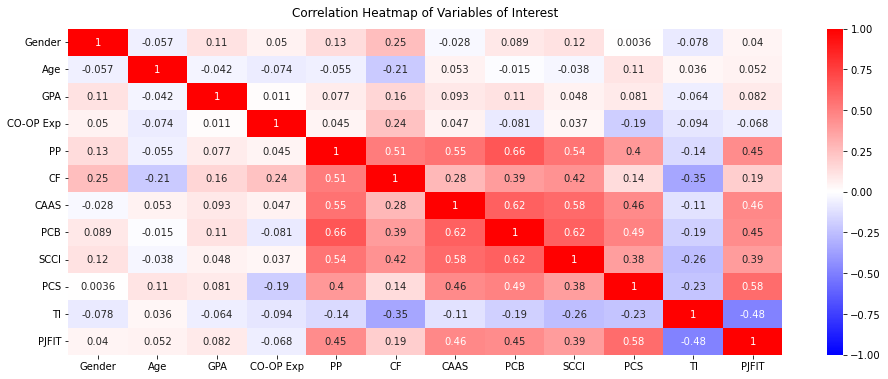

In [17]:
# Correlation using a heat map

from scipy.stats import pearsonr
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_cleaned[['Gender','Age', 'GPA','CO-OP Exp','PP','CF','CAAS','PCB','SCCI','PCS','TI','PJFIT']].corr(),
           cmap="bwr",vmin=-1, vmax=1, annot= True)
heatmap.set_title('Correlation Heatmap of Variables of Interest', fontdict={'fontsize':12}, pad=12)


In [18]:
# Examining correlation p values with covariates loaded (Gender, Age, GPA, Co-op experience).
# Gender was dummy coded variable, where 1 = male, 0 = female.
# CO-OP experience was dummy coded, where 1 = having experience, and 0 = no experience.
# The magnitude of all the correlation coefficient should be less than 0.80 for not violating multicollinearity.

rho = df_cleaned[['Gender','Age', 'GPA','CO-OP Exp','PP','CF','CAAS','PCB','SCCI','PCS','TI','PJFIT']].corr()
pval = df_cleaned[['Gender','Age', 'GPA','CO-OP Exp','PP','CF','CAAS','PCB','SCCI','PCS','TI','PJFIT']].corr(
    method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p


,Gender,Age,GPA,CO-OP Exp,PP,CF,CAAS,PCB,SCCI,PCS,TI,PJFIT
Gender,1.0***,-0.06,0.11*,0.05,0.13**,0.25***,-0.03,0.09,0.12**,0.0,-0.08,0.04
Age,-0.06,1.0***,-0.04,-0.07,-0.06,-0.21***,0.05,-0.01,-0.04,0.11*,0.04,0.05
GPA,0.11*,-0.04,1.0***,0.01,0.08,0.16***,0.09,0.11*,0.05,0.08,-0.06,0.08
CO-OP Exp,0.05,-0.07,0.01,1.0***,0.04,0.24***,0.05,-0.08,0.04,-0.19***,-0.09,-0.07
PP,0.13**,-0.06,0.08,0.04,1.0***,0.51***,0.55***,0.66***,0.54***,0.4***,-0.14**,0.45***
CF,0.25***,-0.21***,0.16***,0.24***,0.51***,1.0***,0.28***,0.39***,0.42***,0.14**,-0.35***,0.19***
CAAS,-0.03,0.05,0.09,0.05,0.55***,0.28***,1.0***,0.62***,0.58***,0.46***,-0.11*,0.46***
PCB,0.09,-0.01,0.11*,-0.08,0.66***,0.39***,0.62***,1.0***,0.62***,0.49***,-0.19***,0.45***
SCCI,0.12**,-0.04,0.05,0.04,0.54***,0.42***,0.58***,0.62***,1.0***,0.38***,-0.26***,0.39***
PCS,0.0,0.11*,0.08,-0.19***,0.4***,0.14**,0.46***,0.49***,0.38***,1.0***,-0.23***,0.58***


#### Test of Linearity Assumption

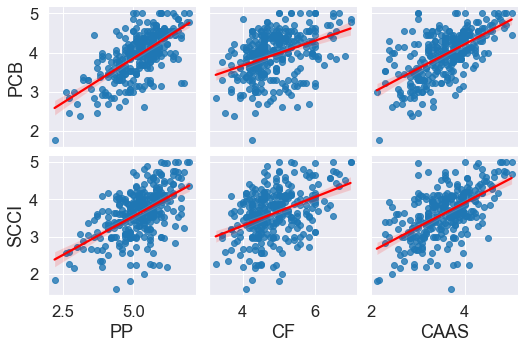

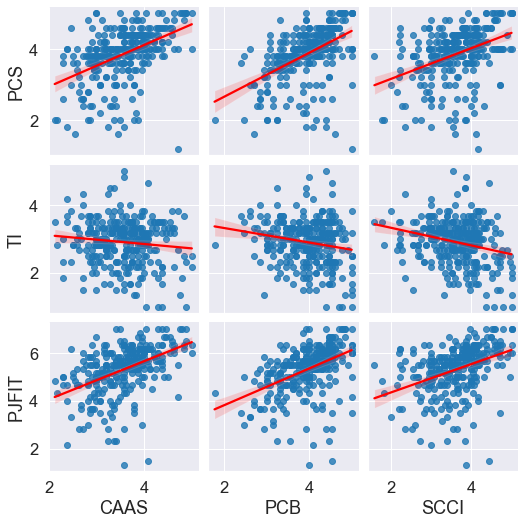

In [19]:
# Linearity test

sns.set(context="notebook", palette="tab10", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
# Linearity of PP, CF, and mediator CAAS as predictor and PCB, SCCI as outcome.
linearity_one = sns.pairplot(df_cleaned, x_vars=['PP','CF','CAAS'], y_vars=['PCB','SCCI'],
                             kind = 'reg', size = 2.5, plot_kws={'line_kws':{'color':'red'}})

# Linearity of CAAS and mediator PCB, SCCI as predictor and PCS, TI, PJFIT as outcome.
linearity_two = sns.pairplot(df_cleaned, x_vars=['CAAS','PCB','SCCI'], y_vars=['PCS','TI','PJFIT'], 
                             kind = 'reg', size = 2.5, plot_kws={'line_kws':{'color':'red'}})


#### Test of Normality Assumption

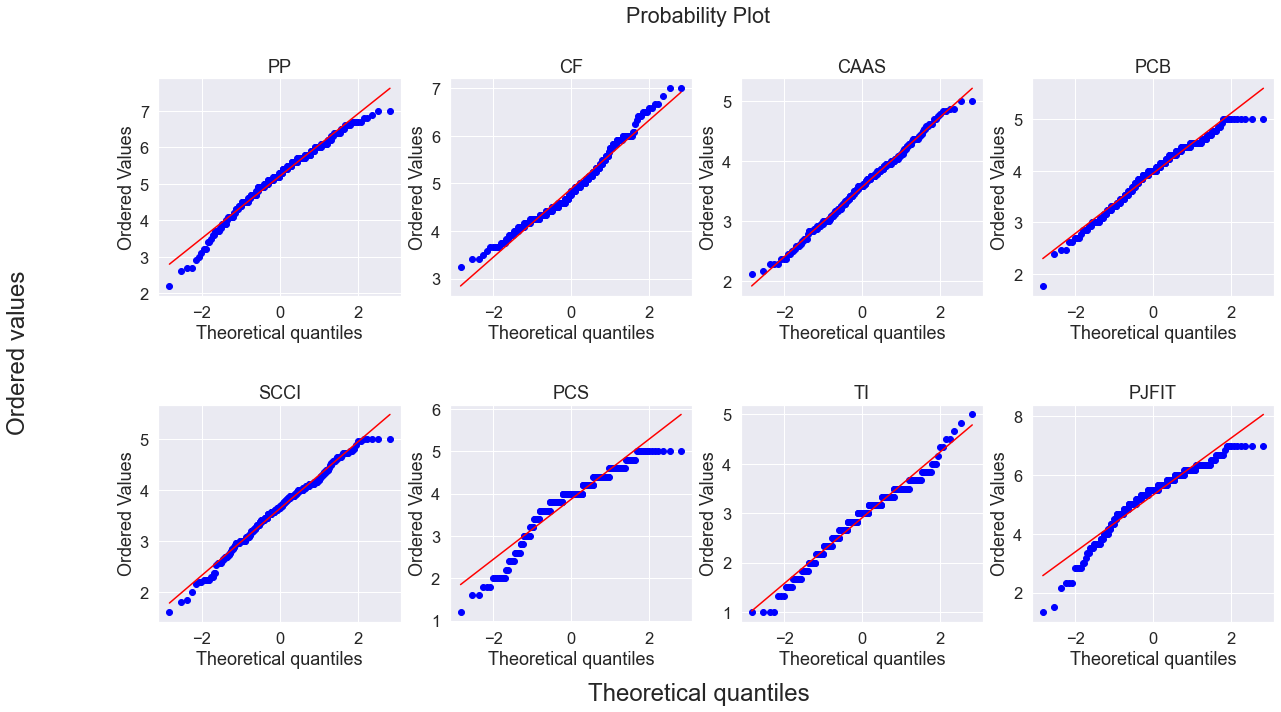

In [20]:
# Normality test using Quantile-Quantile Plots
# Results showed that the all the variables were normally distributed

from scipy import stats
import scipy as scipy

fig, axs = plt.subplots(2,4,figsize=(20, 10))
fig.subplots_adjust(hspace=.5)
fig.supxlabel("Theoretical quantiles", fontsize=24)
fig.supylabel("Ordered values", fontsize=24)
plt.suptitle("Probability Plot")

stats.probplot(df_cleaned['PP'], plot=axs[0,0])
stats.probplot(df_cleaned['CF'],plot=axs[0,1])
stats.probplot(df_cleaned['CAAS'],plot=axs[0,2])
stats.probplot(df_cleaned['PCB'],plot=axs[0,3])
stats.probplot(df_cleaned['SCCI'],plot=axs[1,0])
stats.probplot(df_cleaned['PCS'],plot=axs[1,1])
stats.probplot(df_cleaned['TI'],plot=axs[1,2])
stats.probplot(df_cleaned['PJFIT'],plot=axs[1,3])

axs[0,0].set_title('PP')
axs[0,1].set_title('CF')
axs[0,2].set_title('CAAS')
axs[0,3].set_title('PCB')
axs[1,0].set_title('SCCI')
axs[1,1].set_title('PCS')
axs[1,2].set_title('TI')
axs[1,3].set_title('PJFIT')

plt.show()


#### Test of Homoscedasticity

In [21]:
# Homoscedasticity Test
# Determine the residuals for all the regression models in the study

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

# Predicted values vs. Standardized residuals for CAAS
reg = ols(formula='CAAS~PP+CF',data=df_cleaned).fit()
pred_val = reg.fittedvalues.copy()
true_val = df_cleaned['CAAS'].values.copy()
resid=true_val - pred_val

# Predicted values vs. Standardized residuals for PCB
reg2 = ols(formula='PCB~PP+CF+CAAS',data=df_cleaned).fit()
pred_val2 = reg2.fittedvalues.copy()
true_val2 = df_cleaned['PCB'].values.copy()
resid2 = true_val2 - pred_val2

# Predicted values vs. Standardized residuals for SCCI
reg3 = ols(formula='SCCI~PP+CF+CAAS',data=df_cleaned).fit()
pred_val3 = reg3.fittedvalues.copy()
true_val3 = df_cleaned['SCCI'].values.copy()
resid3 = true_val3 - pred_val3

# Predicted values vs. Standardized residuals for PCS
reg4 = ols(formula='PCS~PCB+SCCI+CAAS',data=df_cleaned).fit()
pred_val4 = reg4.fittedvalues.copy()
true_val4 = df_cleaned['PCS'].values.copy()
resid4 = true_val4 - pred_val4

# Predicted values vs. Standardized residuals for TI
reg5 = ols(formula='TI~PCB+SCCI+CAAS',data=df_cleaned).fit()
pred_val5 = reg5.fittedvalues.copy()
true_val5 = df_cleaned['TI'].values.copy()
resid5 = true_val5 - pred_val5

# Predicted values vs. Standardized residuals for PJFIT
reg6 = ols(formula='PJFIT~PCB+SCCI+CAAS',data=df_cleaned).fit()
pred_val6 = reg6.fittedvalues.copy()
true_val6 = df_cleaned['PJFIT'].values.copy()
resid6 = true_val6 - pred_val6


Text(0.5, 1.0, 'PJFIT')

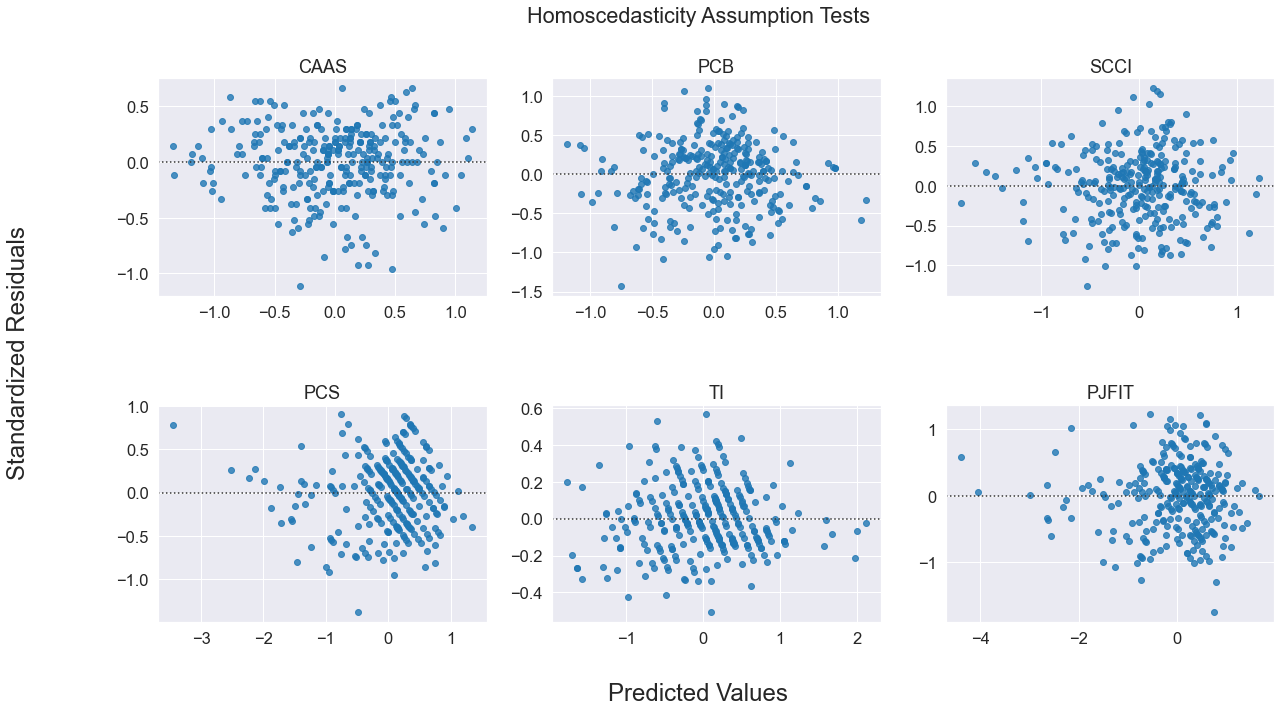

In [22]:
# Plot the Predicted values vs. Standardized residuals for all of the regression models in the study
# Scattered residual plot output indicate homoscedasticity
# All regression models appeared to be scattered
# Only some clustering observed in PBC and PJFIT models

fig, axs = plt.subplots(2,3,figsize=(20, 10))
fig.subplots_adjust(hspace=.5)
fig.supxlabel("Predicted Values", fontsize=24)
fig.supylabel("Standardized Residuals", fontsize=24)
plt.suptitle("Homoscedasticity Assumption Tests")

# Plot the graphs
sns.residplot(resid,pred_val,ax=axs[0,0])
sns.residplot(resid2,pred_val2,ax=axs[0,1])
sns.residplot(resid3,pred_val3,ax=axs[0,2])
sns.residplot(resid4,pred_val4,ax=axs[1,0])
sns.residplot(resid5,pred_val5,ax=axs[1,1])
sns.residplot(resid6,pred_val6,ax=axs[1,2])

# Label each graph
axs[0,0].set_title('CAAS')
axs[0,1].set_title('PCB')
axs[0,2].set_title('SCCI')
axs[1,0].set_title('PCS')
axs[1,1].set_title('TI')
axs[1,2].set_title('PJFIT')


[<a href="#Table-of-Contents">Back to top </a>]

### Results

- Multivariate regression analysis was conducted to test for hypothesis 1.
- Mediation analyses were conducted to test the indirect effects using bootstrap method.
- Gender, GPA, and Co-op experiences were loaded as covariates in the model.


#### Regression Analysis

#### Hypothesis 1

In [45]:
# Multivariate Regression of proactive personality and cognitive flexibility on career adaptability 
regression = pg.linear_regression(df_cleaned[['PP','CF']], df_cleaned['CAAS'])
regression.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.64,0.21,7.83,0.0,0.3,0.29,1.23,2.06
1,PP,0.37,0.04,9.69,0.0,0.3,0.29,0.29,0.45
2,CF,0.00,0.05,0.00,1.0,0.3,0.29,-0.09,0.09


#### Mediation Analyses

#### Hypothesis 2

In [41]:
#1 Proactive personality (predictor) to career adaptability (mediator), to proactive career behaviour (outcome).
PP_CAAS_PCB = pg.mediation_analysis(data=df_cleaned, x='PP', m='CAAS', y='PCB',
                                    covar = ['Gender','GPA', 'CO-OP Exp'], seed=42, n_boot=10000)
PP_CAAS_PCB

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,CAAS ~ X,0.375924,0.032981,3.502893e-25,0.311016,0.440833,Yes
1,Y ~ CAAS,0.631797,0.045580,5.463158e-34,0.542093,0.721501,Yes
2,Total,0.451336,0.029919,1.655124e-38,0.392454,0.510219,Yes
3,Direct,0.307999,0.032638,1.222072e-18,0.243766,0.372232,Yes
4,Indirect,0.143338,0.023693,0.000000e+00,0.100730,0.193776,Yes


In [25]:
#2 Proactive personality (predictor) to career adaptability (mediator), to career construction behaviour (outcome).
PP_CAAS_SCCI = pg.mediation_analysis(data=df_cleaned, x='PP', m='CAAS', y='SCCI',
                                    covar = ['Gender','GPA', 'CO-OP Exp'], seed=42, n_boot=10000)
PP_CAAS_SCCI

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,CAAS ~ X,0.375924,0.032981,3.502893e-25,0.311016,0.440833,Yes
1,Y ~ CAAS,0.664859,0.053018,3.331006e-29,0.560517,0.769200,Yes
2,Total,0.408086,0.037779,3.872652e-23,0.333735,0.482438,Yes
3,Direct,0.227799,0.041246,7.339850e-08,0.146624,0.308975,Yes
4,Indirect,0.180287,0.029251,0.000000e+00,0.127606,0.243912,Yes


In [26]:
#3 Cognitive flexibility (predictor) to career adaptability (mediator), to proactive career behaviour (outcome).
CF_CAAS_PCB = pg.mediation_analysis(data=df_cleaned, x='CF', m='CAAS', y='PCB',
                                    covar = ['Gender','GPA', 'CO-OP Exp'], seed=42, n_boot=10000)
CF_CAAS_PCB

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,CAAS ~ X,0.242305,0.047558,6.239128e-07,0.148708,0.335902,Yes
1,Y ~ CAAS,0.631797,0.045580,5.463158e-34,0.542093,0.721501,Yes
2,Total,0.347652,0.045616,3.451523e-13,0.257879,0.437425,Yes
3,Direct,0.211685,0.038653,9.317788e-08,0.135613,0.287757,Yes
4,Indirect,0.135967,0.027923,0.000000e+00,0.084813,0.194375,Yes


In [27]:
#4 Cognitive flexibility (predictor) to career adaptability (mediator), to career construction behaviour (outcome).
CF_CAAS_SCCI = pg.mediation_analysis(data=df_cleaned, x='CF', m='CAAS', y='SCCI',
                                    covar = ['Gender','GPA', 'CO-OP Exp'], seed=42, n_boot=10000)
CF_CAAS_SCCI

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,CAAS ~ X,0.242305,0.047558,6.239128e-07,0.148708,0.335902,Yes
1,Y ~ CAAS,0.664859,0.053018,3.331006e-29,0.560517,0.769200,Yes
2,Total,0.397411,0.050921,1.045393e-13,0.297197,0.497626,Yes
3,Direct,0.257107,0.044753,2.294122e-08,0.169030,0.345183,Yes
4,Indirect,0.140305,0.029581,0.000000e+00,0.086259,0.202636,Yes


#### Hypothesis 3

In [29]:
#6 Career adaptability (predictor) to proactive career behaviour, career construction behaviour (mediators), 
#  to turnover intention (outcome).

CAAS_PCB_SCCI_TI = pg.mediation_analysis(data=df_cleaned, x='CAAS', m=['PCB','SCCI'], y='TI',
                                    covar = ['Gender','GPA', 'CO-OP Exp'], seed=42, n_boot=10000)
CAAS_PCB_SCCI_TI

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,PCB ~ X,0.631797,0.045580,5.463158e-34,0.542093,0.721501,Yes
1,SCCI ~ X,0.664859,0.053018,3.331006e-29,0.560517,0.769200,Yes
2,Y ~ PCB,-0.060569,0.082956,4.658934e-01,-0.223832,0.102694,No
3,Y ~ SCCI,-0.218229,0.074017,3.451008e-03,-0.363900,-0.072558,Yes
4,Total,-0.122116,0.066756,6.836562e-02,-0.253495,0.009262,No
5,Direct,0.113008,0.088357,2.019075e-01,-0.060886,0.286903,No
6,Indirect PCB,-0.068484,0.063442,2.664000e-01,-0.195706,0.054692,No
7,Indirect SCCI,-0.166641,0.049985,1.000000e-03,-0.270834,-0.071970,Yes


#### Hypothesis 4

In [28]:
#5 Career adaptability (predictor) to proactive career behaviour, career construction behaviour (mediators), 
#  to perceived career success (outcome).

CAAS_PCB_SCCI_PCS = pg.mediation_analysis(data=df_cleaned, x='CAAS', m=['PCB','SCCI'], y='PCS',
                                    covar = ['Gender','GPA', 'CO-OP Exp'], seed=42, n_boot=10000)
CAAS_PCB_SCCI_PCS


,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,PCB ~ X,0.631797,0.045580,5.463158e-34,0.542093,0.721501,Yes
1,SCCI ~ X,0.664859,0.053018,3.331006e-29,0.560517,0.769200,Yes
2,Y ~ PCB,0.474352,0.081088,1.309557e-08,0.314767,0.633938,Yes
3,Y ~ SCCI,0.177510,0.072350,1.472854e-02,0.035120,0.319900,Yes
4,Total,0.593087,0.064480,6.844474e-18,0.466187,0.719986,Yes
5,Direct,0.323611,0.084519,1.574459e-04,0.157270,0.489952,Yes
6,Indirect PCB,0.213164,0.068720,2.000000e-03,0.076161,0.348797,Yes
7,Indirect SCCI,0.056311,0.050789,2.626000e-01,-0.033495,0.169524,No


In [30]:
#7 Career adaptability (predictor) to proactive career behaviour, career construction behaviour (mediators), 
#  to person-job fit (outcome).

CAAS_PCB_SCCI_PJFIT = pg.mediation_analysis(data=df_cleaned, x='CAAS', m=['PCB','SCCI'], y='PJFIT',
                                    covar = ['Gender','GPA', 'CO-OP Exp'], seed=42, n_boot=10000)
CAAS_PCB_SCCI_PJFIT


,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,PCB ~ X,0.631797,0.045580,5.463158e-34,0.542093,0.721501,Yes
1,SCCI ~ X,0.664859,0.053018,3.331006e-29,0.560517,0.769200,Yes
2,Y ~ PCB,0.556237,0.113544,1.594405e-06,0.332775,0.779700,Yes
3,Y ~ SCCI,0.286289,0.101310,5.038103e-03,0.086905,0.485673,Yes
4,Total,0.804743,0.088890,1.940874e-17,0.629804,0.979683,Yes
5,Direct,0.485254,0.117913,5.029985e-05,0.253190,0.717319,Yes
6,Indirect PCB,0.221678,0.095975,2.220000e-02,0.028600,0.410431,Yes
7,Indirect SCCI,0.097811,0.069363,1.372000e-01,-0.027844,0.246927,No


In [31]:
# Clean the results and by dropping unnecessary rows and keeping only the rows with pvalues needed for interpretations
# Adding a new column to each result output to indicate the specific mediation analysis
# Use Benjamini Hockberg's False Discovery Rate method to rule out family-wise errors

PP_CAAS_PCB['label'] = 'PP_CAAS_PCB'
PP_CAAS_PCB = PP_CAAS_PCB.drop(index=([0,1,2]))

PP_CAAS_SCCI['label'] = 'PP_CAAS_SCCI'
PP_CAAS_SCCI = PP_CAAS_SCCI.drop(index=([0,1,2]))

CF_CAAS_PCB['label'] = 'CF_CAAS_PCB'
CF_CAAS_PCB = CF_CAAS_PCB.drop(index=([0,1,2]))

CF_CAAS_SCCI['label'] = 'CF_CAAS_SCCI'
CF_CAAS_SCCI = CF_CAAS_SCCI.drop(index=([0,1,2]))

CAAS_PCB_SCCI_PCS['label'] = 'CAAS_PCB_SCCI_PCS'
CAAS_PCB_SCCI_PCS = CAAS_PCB_SCCI_PCS.drop(index=([0,1,2,3,4]))

CAAS_PCB_SCCI_TI['label'] = 'CAAS_PCB_SCCI_TI'
CAAS_PCB_SCCI_TI = CAAS_PCB_SCCI_TI.drop(index=([0,1,2,3,4]))

CAAS_PCB_SCCI_PJFIT['label'] = 'CAAS_PCB_SCCI_PJFIT'
CAAS_PCB_SCCI_PJFIT = CAAS_PCB_SCCI_PJFIT.drop(index=([0,1,2,3,4]))

#### Post Hoc test using False Discovery Rate

In [32]:
# Compute for FDR

Mediation_results = [PP_CAAS_PCB,PP_CAAS_SCCI,CF_CAAS_PCB,CF_CAAS_SCCI,CAAS_PCB_SCCI_PCS,CAAS_PCB_SCCI_TI,
                    CAAS_PCB_SCCI_PJFIT]
FDR = pd.concat(Mediation_results, axis=0, ignore_index=True)



FDR-controlling procedures provide less stringent control of Type I errors compared to familywise error rate (FWER) controlling procedures (such as the Bonferroni correction), which control the probability of at least one Type I error.
Bejamini-Hochberg procedure was used.

![title](./fdr2.JPG)

In [33]:
FDR

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig,label
0,Direct,0.307999,0.032638,1.222072e-18,0.243766,0.372232,Yes,PP_CAAS_PCB
1,Indirect,0.143338,0.023693,0.000000e+00,0.100730,0.193776,Yes,PP_CAAS_PCB
2,Direct,0.227799,0.041246,7.339850e-08,0.146624,0.308975,Yes,PP_CAAS_SCCI
3,Indirect,0.180287,0.029251,0.000000e+00,0.127606,0.243912,Yes,PP_CAAS_SCCI
4,Direct,0.211685,0.038653,9.317788e-08,0.135613,0.287757,Yes,CF_CAAS_PCB
5,Indirect,0.135967,0.027923,0.000000e+00,0.084813,0.194375,Yes,CF_CAAS_PCB
6,Direct,0.257107,0.044753,2.294122e-08,0.169030,0.345183,Yes,CF_CAAS_SCCI
7,Indirect,0.140305,0.029581,0.000000e+00,0.086259,0.202636,Yes,CF_CAAS_SCCI
8,Direct,0.323611,0.084519,1.574459e-04,0.157270,0.489952,Yes,CAAS_PCB_SCCI_PCS
9,Indirect PCB,0.213164,0.068720,2.000000e-03,0.076161,0.348797,Yes,CAAS_PCB_SCCI_PCS


In [34]:
# Use Benjamini-Hockberg's method of testing for false discovery rate
# True indicates rejected the null hypothesis, and False indicates fail to reject the null hypothesis

from statsmodels.stats.multitest import fdrcorrection
FDR_Arrays = fdrcorrection(FDR['pval'])


#### Accepted hypothesis tests

In [35]:
FDR_Arrays


(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False, False, False,  True,  True,  True, False]),
 array([4.15504640e-18, 0.00000000e+00, 1.78253510e-07, 0.00000000e+00,
        1.98002998e-07, 0.00000000e+00, 6.50001116e-08, 0.00000000e+00,
        2.67657975e-04, 2.83333333e-03, 2.66400000e-01, 2.28828490e-01,
        2.66400000e-01, 1.54545455e-03, 9.50108260e-05, 2.90307692e-02,
        1.66600000e-01]))

### Findings:
- Hypothesis 1 partially supported 
- Hypothesis 2 supported
- Hypothesis 3 did not support
- Hypothesis 4 supported


[<a href="#Table-of-Contents">Back to top </a>]